<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Logparser/blob/master/data_augmentation_with_python_chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 8

## 🌻 Welcome to Chapter 8, "Audio spectrograme Augmentation"


This chapter will cover the audio spectrogram standard format, variation of a spectrogram, Mel-spectrogram, Chroma Short-time Fourier transformation (STFT), and augmentation techniques. In particular, we will cover the following topics: 

- Initialize and download 

- Audio spectrogram 

- Various spectrogram format 

- Mel-spectrogram and Chroma STFT 

- Spectrogram augmentation  

- Spectrogram image augmentation 

# Load Notebook


- This Notebook original link is: 
  - https://github.com/PacktPublishing/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_7.ipynb

# GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.25.1


In [2]:
url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 74 (delta 29), reused 28 (delta 11), pack-reused 22
Unpacking objects: 100% (74/74), 4.25 MiB | 6.83 MiB/s, done.


In [3]:
# (optional) list the notebook magic commands
# %lsmagic

## Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [4]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [5]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

# Run Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [6]:
# %% CARRY-OVER code install

!pip install opendatasets --upgrade
!pip install pyspellchecker 
!pip install audiomentations


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [7]:
#load and run the pluto chapter 7 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_7.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


## Verify Pluto

In [8]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2023/03/23 11:52
                    Platform : linux
     Pluto Version (Chapter) : 7.0
             Python (3.7.10) : actual: 3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]
            PyTorch (1.11.0) : actual: 1.13.1+cu116
              Pandas (1.3.5) : actual: 1.4.4
                 PIL (9.0.0) : actual: 8.4.0
          Matplotlib (3.2.2) : actual: 3.7.1
                   CPU count : 2
                   CPU speed : 2.20 GHz
               CPU max speed : 0.00 GHz
---------------------------- : ----------------------------


In [9]:
# # (optional) list attributes, function, and everything else
# dir(pluto)

## (Optional) Export to .py

In [10]:
pluto_chapter_8 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_8.py'
!cp {pluto_file} {pluto_chapter_8}

# ✋ Set up Kaggle username and app Key

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.

- STOP: Update your Kaggle access username or key first.

In [11]:
# %%CARRY-OVER code 

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("raghavankrishnan", "c5578b1885f02c57d712e3e5502c6d66")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Required version 0.7+ 0.7.1


# Fetch Kaggle Data

## Musical Emotions Classification

In [12]:
%%time
url = 'https://www.kaggle.com/datasets/kingofarmy/musical-emotions-classification'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 641M/641M [00:05<00:00, 129MB/s]



CPU times: user 5.57 s, sys: 2.39 s, total: 7.97 s
Wall time: 13 s


In [13]:
f = 'kaggle/musical-emotions-classification/Train.csv'
pluto.df_music_data = pluto.fetch_df(f)
pluto.df_music_data.head(3)

GroupID         ImageID Target  Shapes
0  Happy102  Happy10200.wav  Happy  220608
1  Happy102  Happy10201.wav  Happy  220608
2  Happy102  Happy10202.wav  Happy  220608

In [14]:
# # /content/kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/Happy/Happy10200.wav
# # remove white space in directory and filename
# # run this until no error/output
# f = 'kaggle/sea-animals-image-dataste'
# #!find {f} -name "* *" -type d | rename 's/ /_/g'
# !find {f} -name "* *" -type f | rename 's/ /_/g'

In [15]:
# %%writefile -a {pluto_chapter_7}

pluto.version = 7.0
# augment full path
@add_method(PacktDataAug)
def _append_music_full_path(self,x):
  y = re.findall('([a-zA-Z ]*)\d*.*', x)[0]
  return (f'kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/{y}/{x}')
#
@add_method(PacktDataAug)
def fetch_music_full_path(self, df):
  df['fname'] = df.ImageID.apply(self._append_music_full_path)
  return df

In [16]:
pluto.fetch_music_full_path(pluto.df_music_data)
pluto.df_music_data.head(3)

GroupID         ImageID Target  Shapes  \
0  Happy102  Happy10200.wav  Happy  220608   
1  Happy102  Happy10201.wav  Happy  220608   
2  Happy102  Happy10202.wav  Happy  220608   

                                               fname  
0  kaggle/musical-emotions-classification/Audio_F...  
1  kaggle/musical-emotions-classification/Audio_F...  
2  kaggle/musical-emotions-classification/Audio_F...

## Human Speech

In [17]:
%%time
url = 'https://www.kaggle.com/datasets/ejlok1/cremad'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 451M/451M [00:04<00:00, 109MB/s]



CPU times: user 6.41 s, sys: 2.1 s, total: 8.51 s
Wall time: 14.7 s


In [18]:
# /content/kaggle/cremad/AudioWAV/1001_DFA_ANG_XX.wav
# change method name to make_dir_dframe
f = 'kaggle/cremad/AudioWAV'
pluto.df_voice_data = pluto.make_dir_dataframe(f)
pluto.df_voice_data.head(3)

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py:199: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)


fname     label
0  kaggle/cremad/AudioWAV/1032_IOM_DIS_XX.wav  AudioWAV
1  kaggle/cremad/AudioWAV/1056_TIE_HAP_XX.wav  AudioWAV
2  kaggle/cremad/AudioWAV/1043_TIE_DIS_XX.wav  AudioWAV

In [19]:
pluto.df_voice_data.head(3)

fname     label
0  kaggle/cremad/AudioWAV/1032_IOM_DIS_XX.wav  AudioWAV
1  kaggle/cremad/AudioWAV/1056_TIE_HAP_XX.wav  AudioWAV
2  kaggle/cremad/AudioWAV/1043_TIE_DIS_XX.wav  AudioWAV

## Urban sound

In [20]:
%%time
url = 'https://www.kaggle.com/datasets/rupakroy/urban-sound-8k'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 5.61G/5.61G [00:56<00:00, 106MB/s] 



CPU times: user 58.7 s, sys: 21.1 s, total: 1min 19s
Wall time: 2min 7s


In [21]:
# /content/kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio/fold1
# change method name to make_dir_dframe
f = 'kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio'
pluto.df_sound_data = pluto.make_dir_dataframe(f)
pluto.df_sound_data.head(3)

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py:199: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)


fname  label
0  kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...  fold7
1  kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...  fold7
2  kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8...  fold7

# Audio control D Major

In [22]:
# %%writefile -a {pluto_chapter_7}

f = 'Data-Augmentation-with-Python/pluto_data/control-d-major.mp3'
data_amp, sam_rate, fname = pluto._fetch_audio_data(f)
pluto.audio_control_dmajor = [data_amp, sam_rate, fname, f]

# Double check on Waveform graph

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-77c4f7fd0488>", line 2, in <module>
    pluto._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  File "/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py", line 51, in y
    return z(*args, **kwargs)
  File "/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py", line 359, in _draw_audio
    self._drop_image(canvas)
  File "/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py", line 51, in y
    return z(*args, **kwargs)
  File "/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py", line 160, in _drop_image
    canvas.savefig(fn, cmap="Greys", bbox_inches="tight", pad_inches=0.25)
  File "/usr/local/lib/python3.9/dist-packages/matplotlib/figure.py", line 3343, in savefig
    self.canvas.print_figure(fname, **kwargs)
  Fi

TypeError: ignored

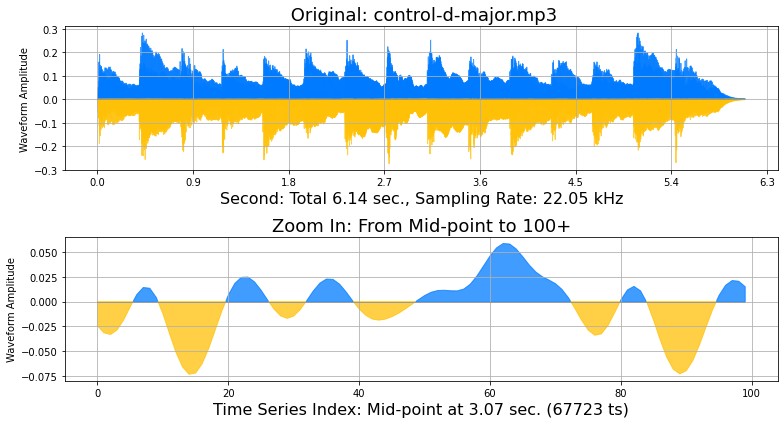

In [23]:
# double check on waveform graph from previous chapter
pluto._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
# display audio 
display(IPython.display.Audio(data_amp, rate=sam_rate))

In [24]:
# (Optional) view raw data
# pluto.audio_control_dmajor

# Spectrogram

In [25]:
# %%writefile -a {pluto_chapter_8}

@add_method(PacktDataAug)
def _draw_spectrogram(self, data_amp, sam_rate, 
  fname='Spectrogram',
  window=matplotlib.mlab.window_hanning,
  cmap='viridis',
  sides='default',
  mode='default'):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(11, 5))
  spec, freq, ts, ax = pic.specgram(data_amp, 
    Fs=sam_rate,
    window=window,
    cmap=cmap,
    sides=sides,
    mode=mode)
  pic.set_xlabel('Time, Sampling Rate: '+str(sam_rate),fontsize=16.)
  pic.set_ylabel('Frequency (Hz)',fontsize=16.)
  pic.set_title(fname,fontsize=18.0)
  #
  # display and save image
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return spec, freq, ts, ax

In [26]:
# %%writefile -a {pluto_chapter_8}

@add_method(PacktDataAug)
def draw_spectrogram(self, df,
  fname='Spectrogram',
  window=matplotlib.mlab.window_hanning,
  cmap='viridis',
  sides='default',
  mode='default'):
  if (type(df) is list):
    data_amp, sam_rate, fname, lname = df
  else:
    lname = self._fetch_1_sample(df)
    data_amp, sam_rate, fname = self._fetch_audio_data(lname)
  #
  spec, freq, ts, ax = self._draw_spectrogram(data_amp, sam_rate,
    fname='Spectrogram: '+fname,
    window=window,
    cmap=cmap,
    sides=sides,
    mode=mode)
  # display audio 
  display(IPython.display.Audio(data_amp,rate=sam_rate))
  return
#
@add_method(PacktDataAug)
def _draw_melspectrogram(self, mel_db, sam_rate, data_amp,
  fname='MelSpectrogram',
  cmap='viridis',
  y_axis='mel',
  y_label='Mel scale (Hz)'):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(11, 5))
  #
  img = librosa.display.specshow(mel_db, 
    sr=sam_rate,
    x_axis='time',
    y_axis=y_axis,
    fmax=8000, 
    ax=pic,
    cmap=cmap)
  canvas.colorbar(img, ax=pic, format='%+2.0f dB')
  #
  pic.set_xlabel('Time, Sampling Rate: '+str(sam_rate),fontsize=16.)
  pic.set_ylabel(y_label,fontsize=16.)
  pic.set_title(fname,fontsize=18.0)
  #
  # display and save image
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  # display audio 
  display(IPython.display.Audio(data_amp,rate=sam_rate))
  return
#
@add_method(PacktDataAug)
def draw_melspectrogram(self, df,
  fname='MelSpectrogram',
  cmap='viridis',
  is_chroma=False):
  if (type(df) is list):
    data_amp, sam_rate, fname, lname = df
  else:
    lname = self._fetch_1_sample(df)
    data_amp, sam_rate, fname = self._fetch_audio_data(lname)
  #
  if (is_chroma):
    mel_db = librosa.feature.chroma_stft(data_amp, 
      sr=sam_rate)
    yax = 'chroma'
    ylab = 'Pitch class'
    tname = 'Chroma STFT: ' + fname
  else:
    mel = librosa.feature.melspectrogram(y=data_amp, 
    sr=sam_rate, 
    n_mels=128,
    fmax=8000)
    mel_db = librosa.power_to_db(mel, ref=numpy.max)
    yax = 'mel'
    ylab = 'Mel scale (Hz)'
    tname = 'Melspectrogram: ' + fname
  #
  self._draw_melspectrogram(mel_db, sam_rate, data_amp,
    cmap=cmap,
    fname=tname,
    y_axis=yax,
    y_label = ylab)
  return
#

TypeError: ignored

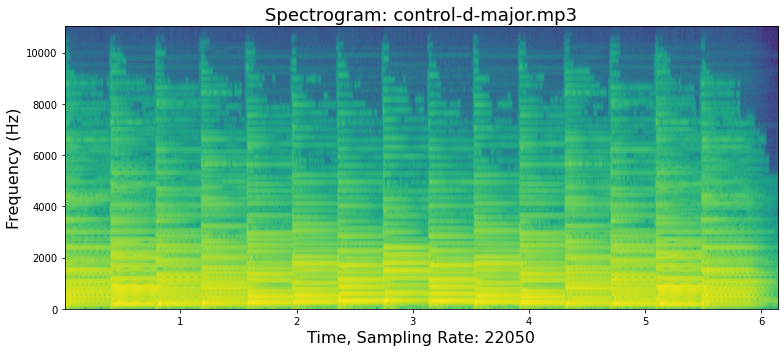

In [27]:
pluto.draw_spectrogram(pluto.audio_control_dmajor)

TypeError: ignored

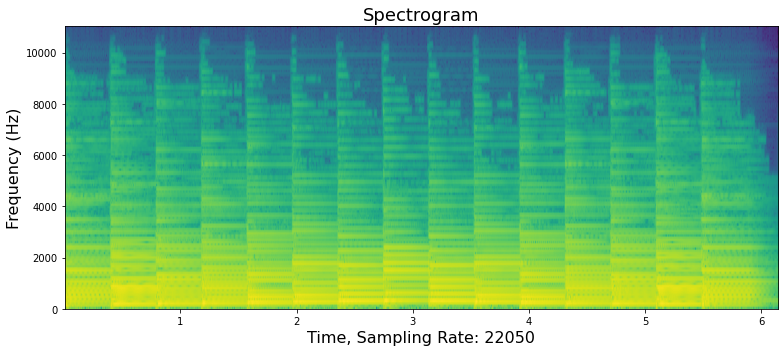

In [28]:
spec, freq, ts, ax = pluto._draw_spectrogram(pluto.audio_control_dmajor[0], pluto.audio_control_dmajor[1])

## Spectrogram parameters

TypeError: ignored

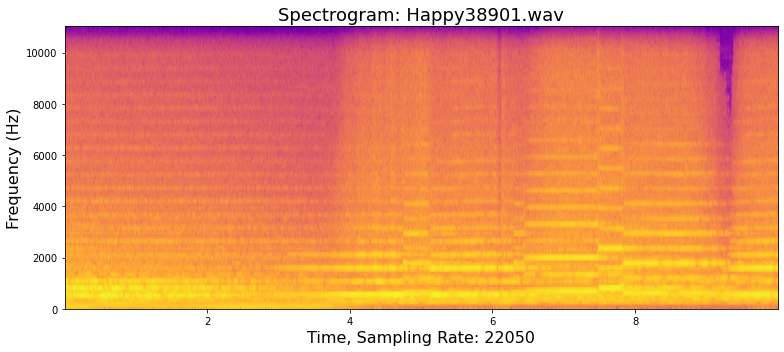

In [29]:
pluto.draw_spectrogram(pluto.df_music_data, cmap='plasma')

TypeError: ignored

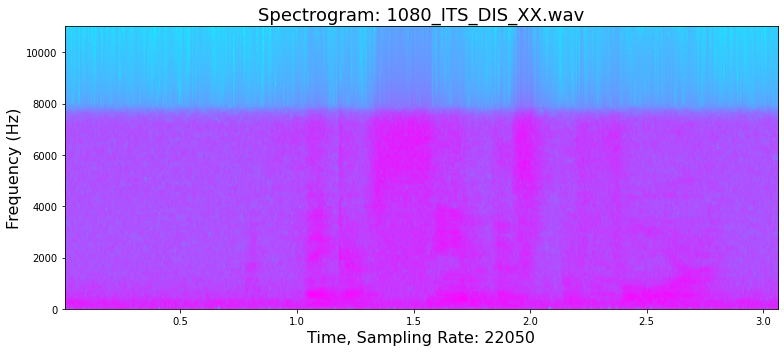

In [30]:
pluto.draw_spectrogram(pluto.df_voice_data, cmap='cool')

TypeError: ignored

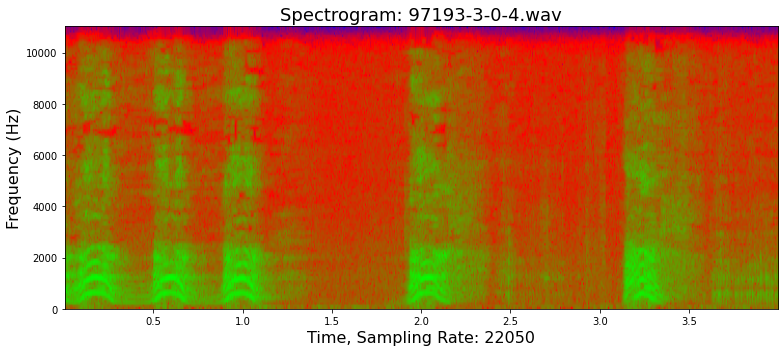

In [31]:
pluto.draw_spectrogram(pluto.df_sound_data, cmap='brg')

TypeError: ignored

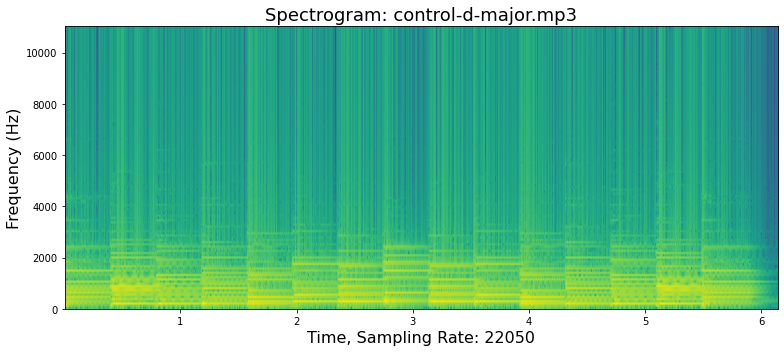

In [32]:
pluto.draw_spectrogram(pluto.audio_control_dmajor,
  window=matplotlib.mlab.window_none)

TypeError: ignored

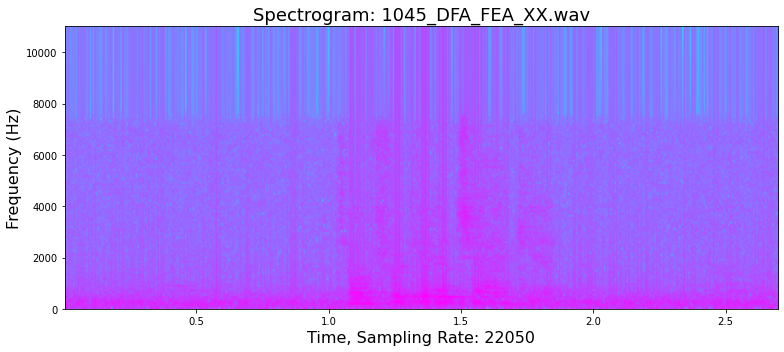

In [33]:
pluto.draw_spectrogram(pluto.df_voice_data,
  cmap='cool',
  window=matplotlib.mlab.window_none)

TypeError: ignored

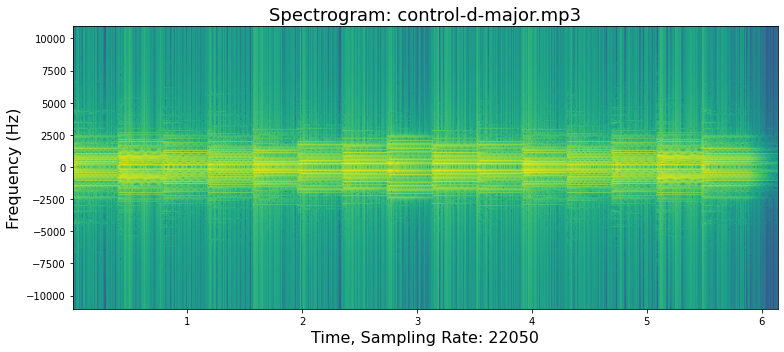

In [34]:
pluto.draw_spectrogram(pluto.audio_control_dmajor,
  window=matplotlib.mlab.window_none,
  sides='twosided')

/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


TypeError: ignored

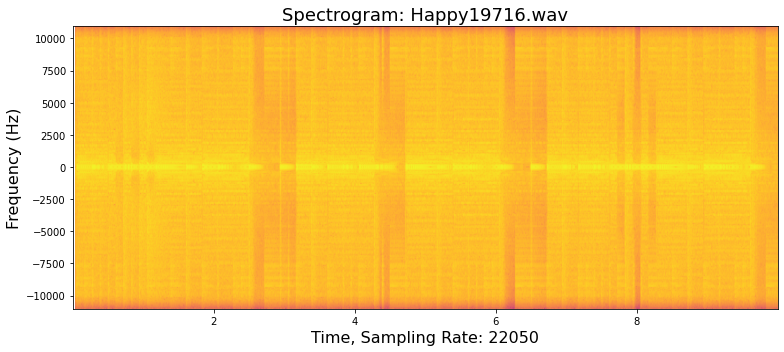

In [35]:
pluto.draw_spectrogram(pluto.df_music_data, 
  cmap='plasma',
  sides='twosided')

TypeError: ignored

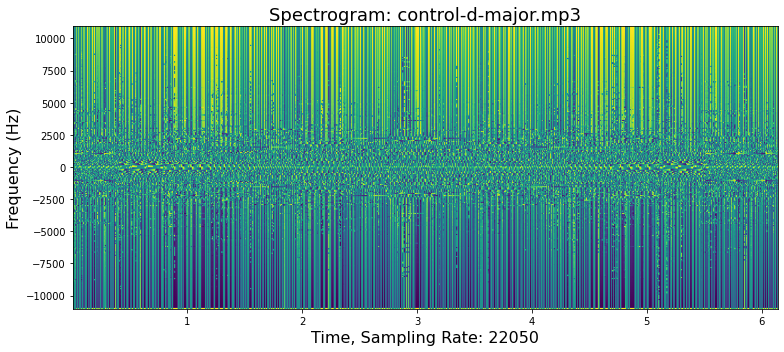

In [36]:
pluto.draw_spectrogram(pluto.audio_control_dmajor,
  window=matplotlib.mlab.window_none,
  sides='twosided',
  mode='angle')

TypeError: ignored

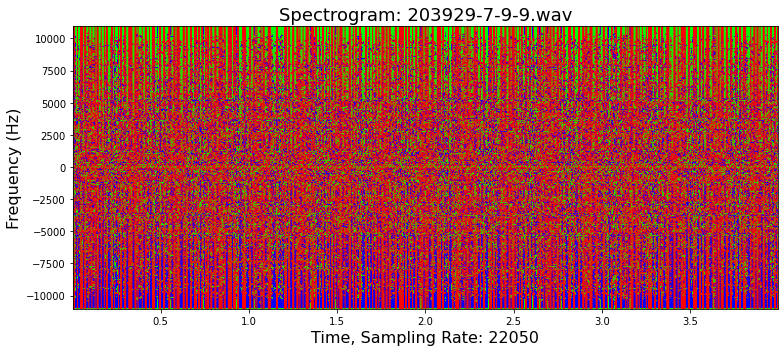

In [37]:
pluto.draw_spectrogram(pluto.df_sound_data,
  cmap='brg',
  window=matplotlib.mlab.window_none,
  sides='twosided',
  mode='angle')

In [38]:
# chiqwawa barking

TypeError: ignored

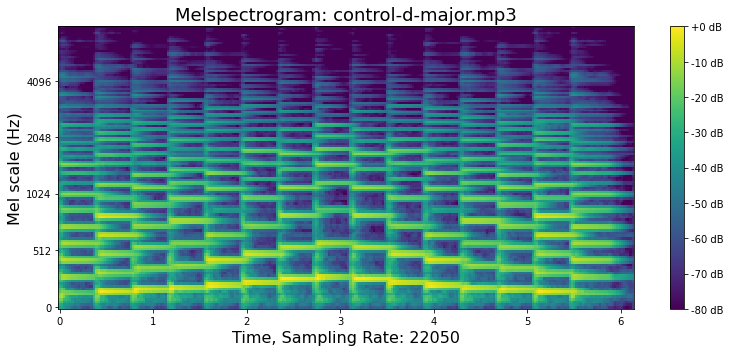

In [39]:
pluto.draw_melspectrogram(pluto.audio_control_dmajor)

TypeError: ignored

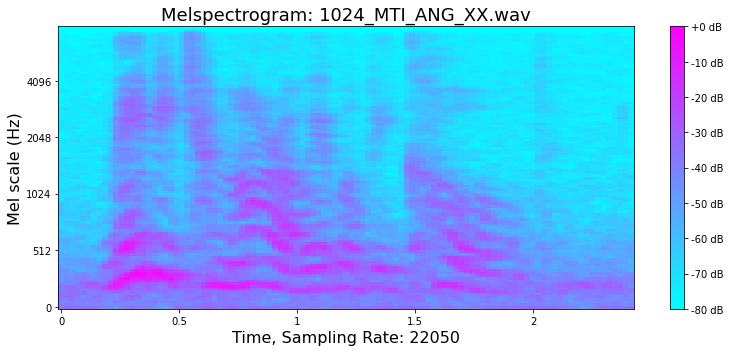

In [40]:
pluto.draw_melspectrogram(pluto.df_voice_data, cmap='cool')

In [41]:
# woman, that is exactly what happens
pluto.fname_id

14

<ipython-input-26-22bfdc38a2a2>:67: FutureWarning: Pass y=[-1.9005806e-06  1.0451000e-05  9.7864549e-06 ... -9.9641620e-06
  1.5720242e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_db = librosa.feature.chroma_stft(data_amp,


TypeError: ignored

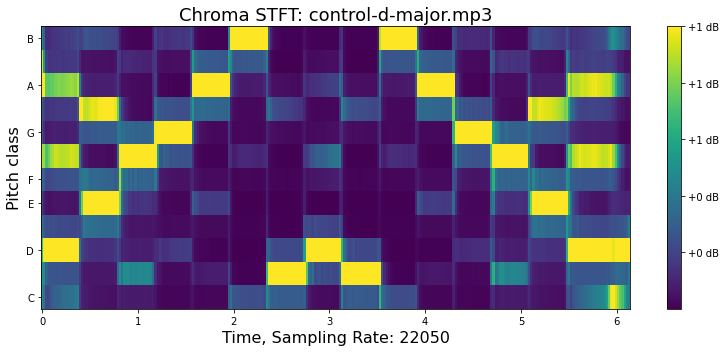

In [42]:
pluto.draw_melspectrogram(pluto.audio_control_dmajor, is_chroma=True)

<ipython-input-26-22bfdc38a2a2>:67: FutureWarning: Pass y=[-9.3207149e-09 -5.8041046e-08 -5.7975534e-08 ... -1.9073407e-01
 -1.8477352e-01 -1.7976680e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_db = librosa.feature.chroma_stft(data_amp,


TypeError: ignored

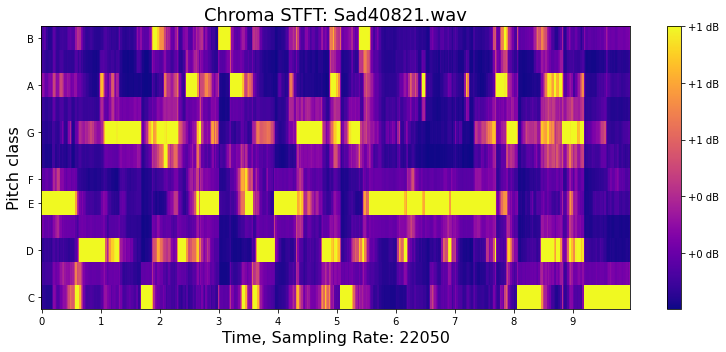

In [43]:
pluto.draw_melspectrogram(pluto.df_music_data, is_chroma=True, cmap='plasma')

In [ ]:
# cinamic strong violen

<ipython-input-26-22bfdc38a2a2>:67: FutureWarning: Pass y=[-0.01986064 -0.00610089  0.00788525 ... -0.12442627 -0.10659657
 -0.184384  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_db = librosa.feature.chroma_stft(data_amp,


TypeError: ignored

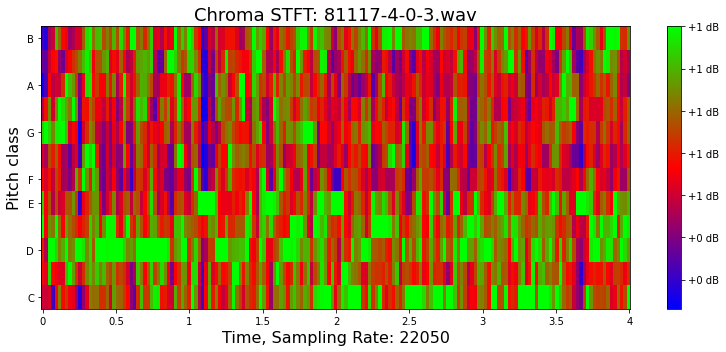

In [44]:
pluto.draw_melspectrogram(pluto.df_sound_data, is_chroma=True, cmap='brg')

# Time shift

In [45]:
# %CARRY-OVER

!pip install audiomentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# %%writefile -a {pluto_chapter_7}

import audiomentations
#
@add_method(PacktDataAug)
def _fetch_1_sample(self, df, dsize=1):
  p = df.sample(dsize)
  p.reset_index(drop=True, inplace=True)
  return p.fname[0]
#
@add_method(PacktDataAug)
def _audio_transform(self, df, xtransform, title='',is_waveform=True):
  if (type(df) is list):
    data_amp, sam_rate, fname, lname = self.audio_control_dmajor
  else:
    lname = self._fetch_1_sample(df)
    data_amp, sam_rate, fname = self._fetch_audio_data(lname)
  #
  xaug = xtransform(data_amp, sample_rate=sam_rate)
  if (is_waveform):
    # augmented
    self._draw_audio(xaug, sam_rate, title + ' Augmented: ' + fname)
    display(IPython.display.Audio(xaug, rate=sam_rate))
    # original
    self._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  else:
    xdata = [xaug, sam_rate, fname, 'cat']
    self.draw_spectrogram(xdata)
    self.draw_melspectrogram(xdata)
    self.draw_melspectrogram(xdata,is_chroma=True)
  display(IPython.display.Audio(data_amp, rate=sam_rate))
  return 

In [47]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_shift(self, df, min_fraction=-0.2,
  max_fraction=0.8,rollover=True,title='Time Shift', is_waveform=True):
  xtransform = audiomentations.Shift(
    min_fraction = min_fraction,
    max_fraction = max_fraction,
    rollover = rollover,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title,is_waveform=is_waveform)
  return 

/content/Data-Augmentation-with-Python/pluto/pluto_chapter_7.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  pics[0].set_xticklabels(b)


TypeError: ignored

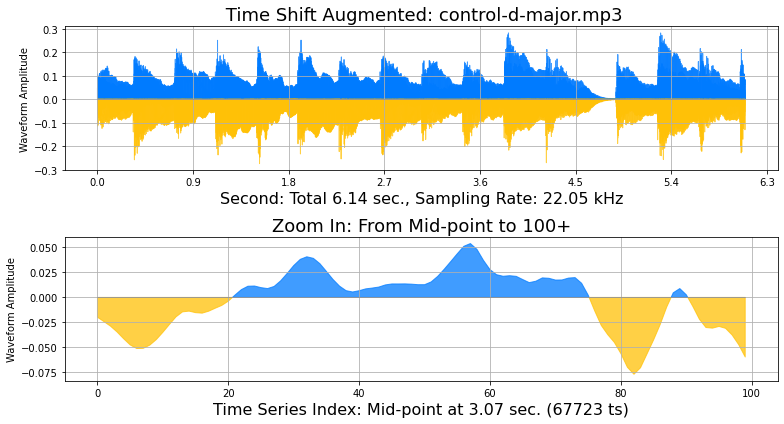

In [48]:
pluto.play_aug_time_shift(pluto.audio_control_dmajor, min_fraction=0.8)

TypeError: ignored

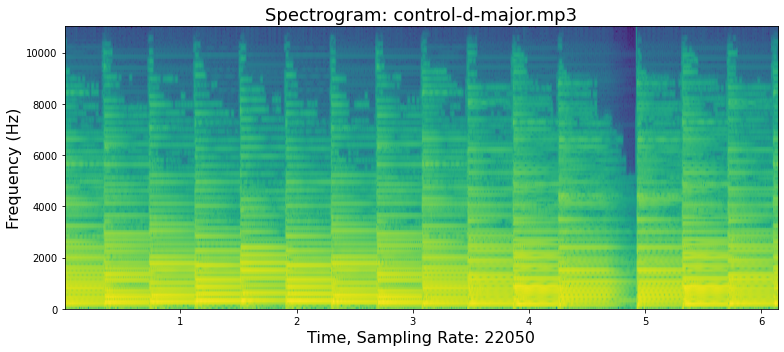

In [49]:
pluto.play_aug_time_shift(pluto.audio_control_dmajor, min_fraction=0.8, is_waveform=False)

TypeError: ignored

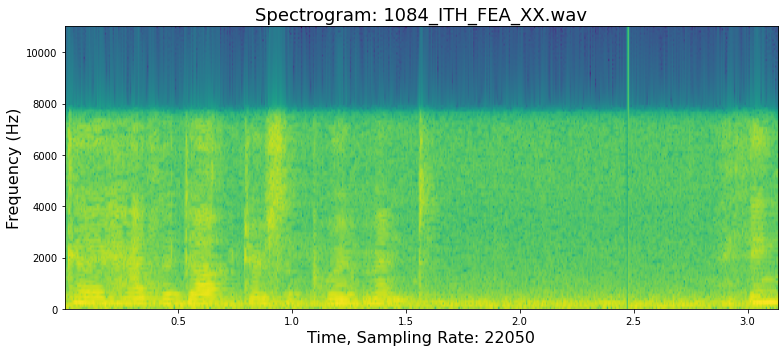

In [50]:
pluto.play_aug_time_shift(pluto.df_voice_data, min_fraction=0.6, is_waveform=False)

# Time stretch

In [51]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_stretch(self, df, min_rate=0.2,max_rate=6.8,
  leave_length_unchanged=True,title='Time Stretch',
  is_waveform=True):
  xtransform = audiomentations.TimeStretch(
    min_rate = min_rate,
    max_rate = max_rate,
    leave_length_unchanged = leave_length_unchanged,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title, is_waveform=is_waveform)
  return 
  # librosa.effects.time_stretch under the hood 

/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


TypeError: ignored

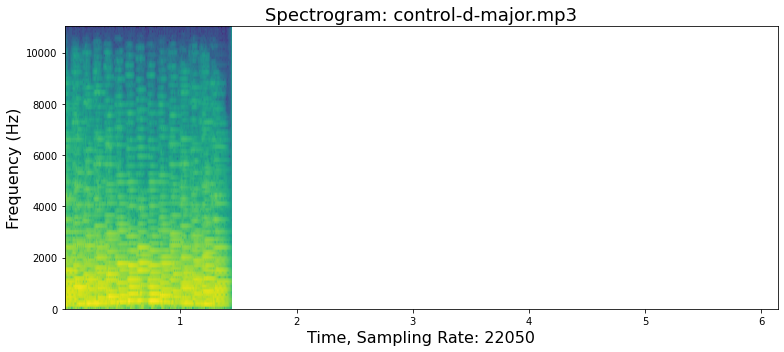

In [52]:
pluto.play_aug_time_stretch(pluto.audio_control_dmajor, max_rate=5.4, is_waveform=False)

In [53]:
# pluto.play_aug_time_stretch(pluto.df_music_data, max_rate=3.0)

TypeError: ignored

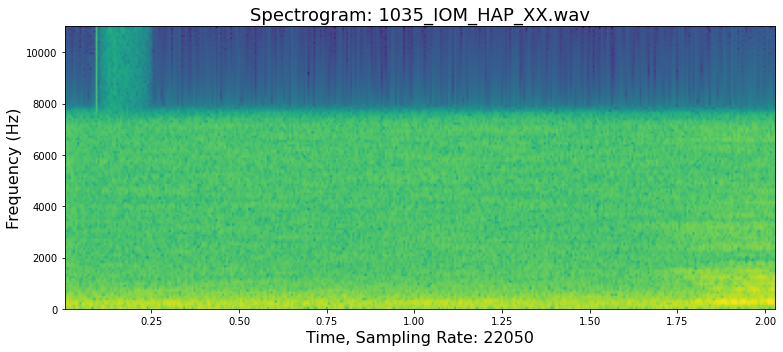

In [54]:
pluto.play_aug_time_stretch(pluto.df_voice_data, max_rate=3.5, is_waveform=False)

# Noise injection, add Gaussian noise

In [55]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_noise_injection(self, df, min_amplitude=0.002,
  max_amplitude=0.2,title='Gaussian noise injection',is_waveform=True):
  xtransform = audiomentations.AddGaussianNoise(
    min_amplitude = min_amplitude,
    max_amplitude = max_amplitude,
    p=1.0)
  self._audio_transform(df, xtransform, title=title, is_waveform=is_waveform)
  return

TypeError: ignored

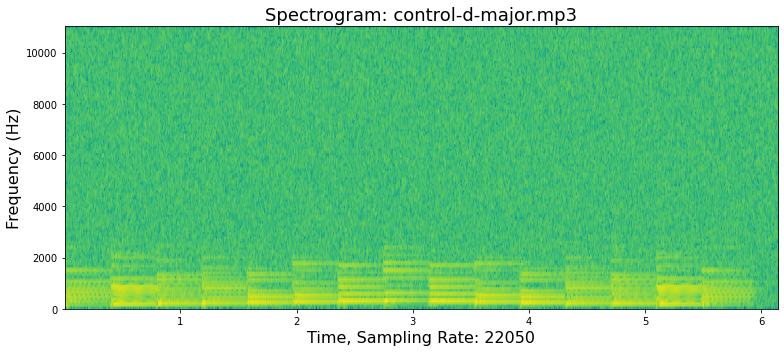

In [56]:
pluto.play_aug_noise_injection(pluto.audio_control_dmajor, 
  min_amplitude=0.02,max_amplitude=0.05,is_waveform=False)

TypeError: ignored

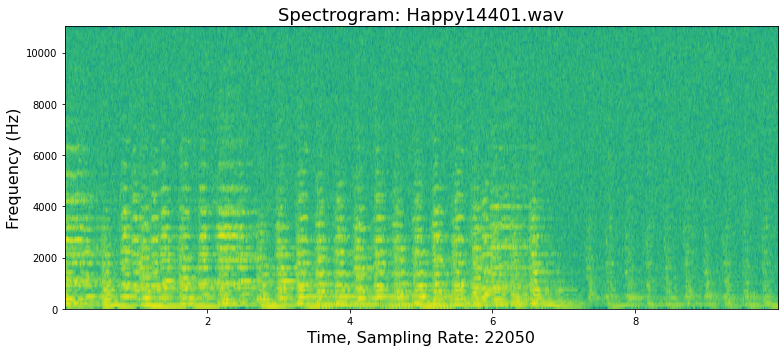

In [57]:
pluto.play_aug_noise_injection(pluto.df_music_data, 
  min_amplitude=0.008,max_amplitude=0.05,is_waveform=False)

TypeError: ignored

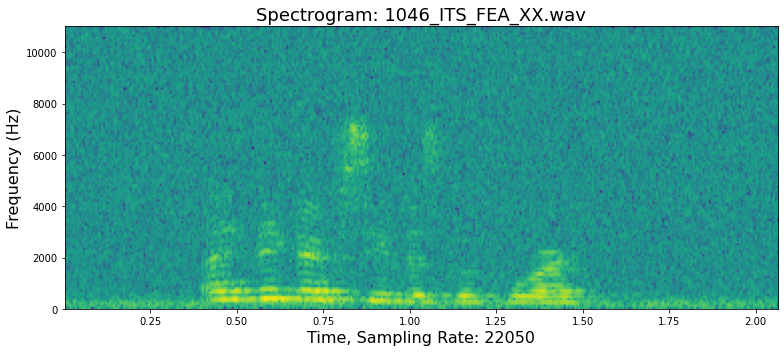

In [58]:
pluto.play_aug_noise_injection(pluto.df_voice_data, max_amplitude=0.05, is_waveform=False)

# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

In [ ]:
# # compress/zip all the pluto generated images from this chapter for download
# f = 'pluto-img-'+str(pluto.fname_id)+'.zip'
# print(f)
# !zip {f} /content/Data-Augmentation-with-Python/pluto_img/*

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm